In [2]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM
using SSMCMain.ModifiedMiCRM.RandomSystems

In [4]:
using Base.Threads, OhMyThreads
using ProgressMeter
using BenchmarkTools
using JLD2
using Geppetto
using DataFrames
using DataFramesMeta
using HypothesisTests

In [5]:
using CairoMakie
using GLMakie
CairoMakie.activate!()
# display(GLMakie.Screen(), f.figure)

# Basic direct competition

In [215]:
ps = make_bmmicrmparams(2, 1;
    m=[1., 2.1],
    c=reshape([1., 2.], (2, 1)),
    l=reshape([0., 0.], (2, 1)),
    K=[5.],
    D=fill(0., 2, 1, 1),
)
Ds = 1e-12
Dr = 1.
ps = BSMMiCRMParams(ps, [Ds, Ds, Dr])

BSMMiCRMParams{Nothing, Nothing, Nothing, Float64}(BMMiCRMParams{Nothing, Float64}([1.0, 1.0], [1.0], [1.0, 2.1], [5.0], [1.0], [0.0; 0.0;;], [1.0; 2.0;;], [0.0; 0.0;;;], nothing), [1.0e-12, 1.0e-12, 1.0], nothing, nothing)

  0.000214 seconds (292 allocations: 22.922 KiB)
s.u[end] = [3.998381561512399, 0.0007101391162308823, 1.0000404415990398]


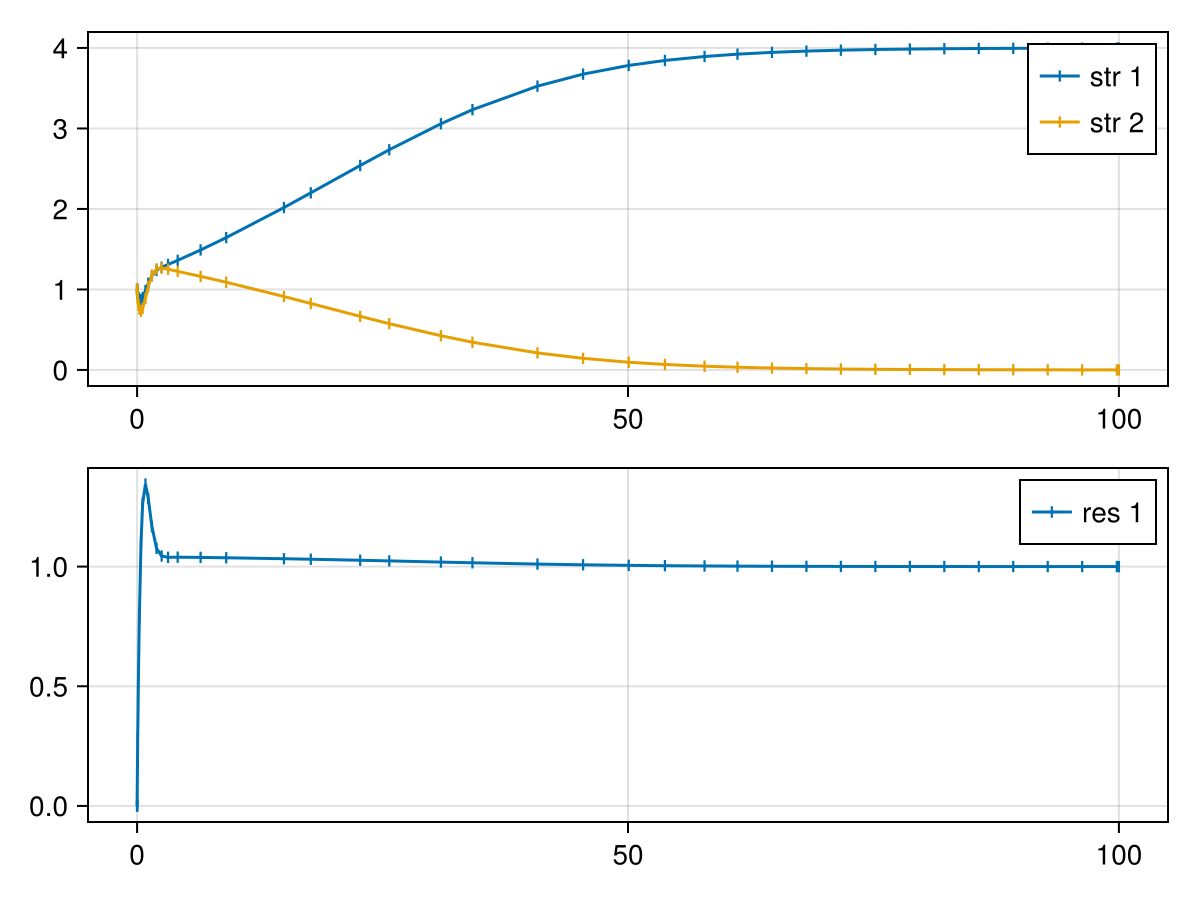

In [216]:
# Fixed time with evolution
# u0 = make_u0_smart(ps; u0=:onlyN);
u0 = [1., 1., 0.]
p = make_mmicrm_problem(ps, u0, 100);
# p = remake_guarantee_positive(p)

@time s = solve(p, TRBDF2();
    callback=make_timer_callback(1.)
)

@show s.u[end]

f = plot_mmicrm_sol(s)
# display(GLMakie.Screen(), f)
f

# Competition of dirct vs minimal model

In [262]:
D = fill(0., 2, 2, 2)
D[2, 2, 1] = 1.

ps = make_bmmicrmparams(2, 2;
    m=[1., 1.],
    c=[1. 0.; 1. 1.],
    l=[0.2 0.; 0.3 0.2],
    K=[5., 0.],
    D
)
Ds = 1e-12
Dr = 1.
ps = BSMMiCRMParams(ps, [Ds, Ds, Dr, Dr])

BSMMiCRMParams{Nothing, Nothing, Nothing, Float64}(BMMiCRMParams{Nothing, Float64}([1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [5.0, 0.0], [1.0, 1.0], [0.2 0.0; 0.3 0.2], [1.0 0.0; 1.0 1.0], [0.0 0.0; 0.0 1.0;;; 0.0 0.0; 0.0 0.0], nothing), [1.0e-12, 1.0e-12, 1.0, 1.0], nothing, nothing)

  0.000138 seconds (198 allocations: 17.734 KiB)
s.u[end] = [1.2371911296486675, 1.928080040635047, 1.201048169614725, 0.23659739945824382]


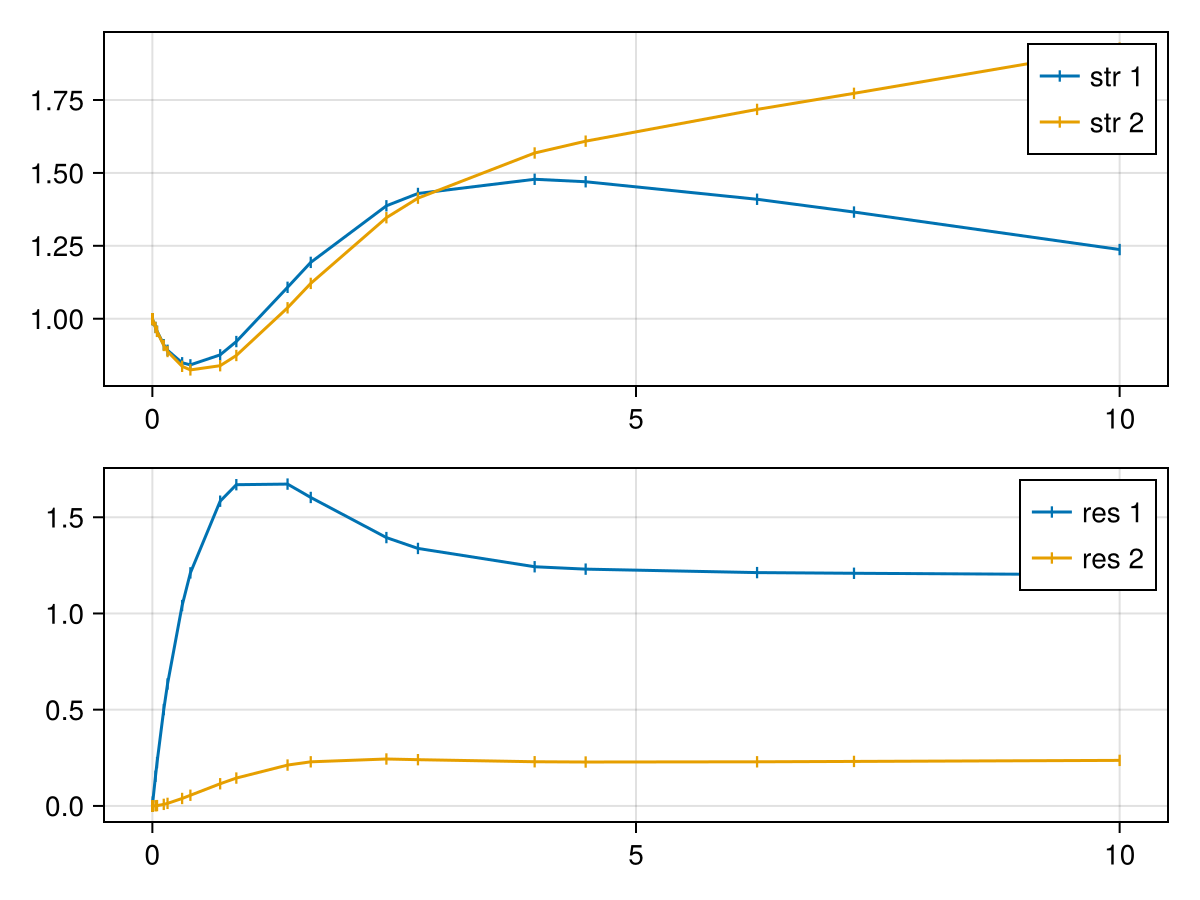

In [263]:
# Fixed time with evolution
# u0 = make_u0_smart(ps; u0=:onlyN);
u0 = [1., 1., 0., 0.]
p = make_mmicrm_problem(ps, u0, 10);
# p = remake_guarantee_positive(p)

@time s = solve(p, TRBDF2();
    callback=make_timer_callback(1.)
)

@show s.u[end]

f = plot_mmicrm_sol(s)
# display(GLMakie.Screen(), f)
f

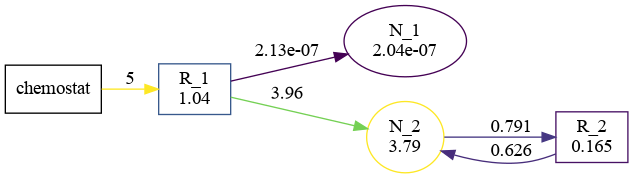

In [237]:
diagram_sfss_v3(ps, s.u[end];
    strain_threshold=-Inf,
    edge_threshold=-Inf,
)